In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_indices(
    file_path, 
    image_dir, 
    label_dir,
    mode, separator=' ', ):
    file_list = []
    with open(file_path, 'r') as f:
        for line in f:
            items = line.strip().split(separator)
            if len(items) != 2:
                if mode == 'train' or mode == 'val':
                    raise ValueError(
                        "File list format incorrect! In training or evaluation task it should be"
                        " image_name{}label_name\\n".format(separator))
                # 
                image_path = os.path.join(image_dir, items[0])
                label_path = None
            else:
                image_path = os.path.join(image_dir, items[0])
                label_path = os.path.join(label_dir, items[1])
            file_list.append([image_path, label_path])
    return file_list

In [17]:
def load_npy_and_save(
    file_list, 
    input_npy_dir, 
    output_npy_dir, 
    saved_dir,
    saved_name
):
    image_npy_concat_path = os.path.join(saved_dir, f"{saved_name}_image_concat.npy")
    label_npy_concat_path = os.path.join(saved_dir, f"{saved_name}_label_concat.npy")
    if os.path.exists(image_npy_concat_path) and os.path.exists(label_npy_concat_path):
        input_npy_concat = np.load(image_npy_concat_path)
        output_npy_concat = np.load(label_npy_concat_path)
    else:
        input_npy_concat = np.stack([np.load(file_path[0]) for file_path in file_list])
        output_npy_concat = np.stack([np.load(file_path[1]) for file_path in file_list])
        np.save(image_npy_concat_path, input_npy_concat)
        np.save(label_npy_concat_path, output_npy_concat)
    return input_npy_concat, output_npy_concat


In [4]:
dataset_dir = "../../data/toy_example/"
dataset_name = "toy_example"
input_npy_dir = os.path.join(dataset_dir, "inputnpy")
output_npy_dir = os.path.join(dataset_dir, "outputnpy")
train_indices_dir = os.path.join(dataset_dir, "train_indices.txt")
train_file_list = read_indices(file_path=train_indices_dir, 
                               image_dir=input_npy_dir,
                               label_dir=output_npy_dir,
                               mode="train")

In [18]:
train_input_npy_concat, train_output_npy_concat = load_npy_and_save(file_list=train_file_list, 
                                                                    input_npy_dir=input_npy_dir, 
                                                                    output_npy_dir=output_npy_dir,
                                                                    saved_dir=dataset_dir,
                                                                    saved_name="train")
print(train_input_npy_concat.shape)
print(train_output_npy_concat.shape)

(397, 512, 512)
(397, 256, 256)


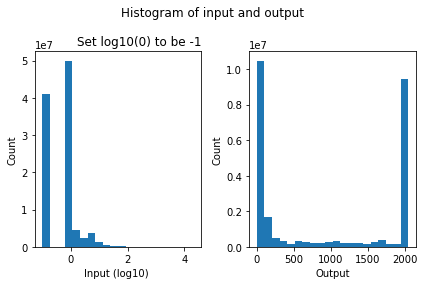

In [27]:
# plot histogram of train_input_numpy
fig, ax = plt.subplots(1, 2, tight_layout=True)
nbins = 20
train_input_npy_concat_log =np.log10(np.maximum(np.ones_like(train_input_npy_concat) * 0.1, train_input_npy_concat)) 

ax[0].hist(train_input_npy_concat_log.reshape(-1), nbins)
ax[1].hist(train_output_npy_concat.reshape(-1), nbins)

# TODO: refine label names
ax[0].set_xlabel("Input (log10) ")
ax[0].set_ylabel("Count")
ax[0].set_title("Set log10(0) to be -1", loc='right')
ax[1].set_xlabel("Output")
ax[1].set_ylabel("Count")

fig.suptitle("Histogram of input and output")
plt.savefig("../../figures/pdf/toy_example/histogram_of_input_output.pdf")
plt.savefig("../../figures/png/toy_example/histogram_of_input_output.png")

fig.show()